<a href="https://colab.research.google.com/github/micah-shull/Machine_Learning_Pipelines/blob/main/pipelines_01_imbalanced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imbalanced Data: An Overview

#### What is Imbalanced Data?

Imbalanced data occurs when the classes in a dataset are not represented equally. This is common in many real-world applications such as fraud detection, medical diagnosis, and anomaly detection, where the event of interest (e.g., fraudulent transaction, disease occurrence) is rare compared to the normal cases.

#### Problems Arising from Imbalanced Data

1. **Bias Towards Majority Class**:
   - Machine learning models can become biased towards the majority class, as they might learn to predict the majority class more often simply because it minimizes the overall error.
   - For example, in a dataset with 95% non-fraudulent transactions and 5% fraudulent ones, a model might achieve 95% accuracy by predicting all transactions as non-fraudulent. However, this model would fail to detect any fraud, which is the primary interest.

2. **Misleading Performance Metrics**:
   - Common performance metrics like accuracy can be misleading. High accuracy in imbalanced datasets doesn’t necessarily mean good performance.
   - Precision, recall, and F1-score are more informative in these scenarios, as they provide insight into the model’s performance on the minority class.

3. **Poor Generalization**:
   - Models trained on imbalanced data may not generalize well to unseen data, particularly for the minority class, leading to poor real-world performance.

### Handling Imbalanced Data with StratifiedShuffleSplit

StratifiedShuffleSplit is a technique used to split data into training and testing sets while preserving the percentage of samples for each class. This ensures that both the training and testing sets are representative of the original dataset's class distribution.

#### How StratifiedShuffleSplit Addresses Imbalanced Data Issues

1. **Maintains Class Distribution**:
   - By maintaining the original class distribution in both training and testing sets, StratifiedShuffleSplit ensures that the model is trained and evaluated on representative samples of each class.
   - This prevents the issue where the training set might contain only the majority class, leading to a model that cannot recognize the minority class.

2. **Improves Model Training**:
   - With representative samples from both classes, the model has the opportunity to learn the characteristics of both the majority and minority classes, leading to better performance.
   - For example, in a medical dataset with 95% healthy patients and 5% patients with a disease, using stratified splitting ensures that the model sees examples of both healthy and diseased patients during training.

3. **Ensures Fair Evaluation**:
   - The testing set also maintains the class distribution, which provides a fair evaluation of the model’s performance on both the majority and minority classes.
   - This is crucial for understanding how well the model can detect the minority class in real-world scenarios.

This ensures that both `X_train` and `X_test` have a similar class distribution to the original dataset, improving the model’s training and evaluation process.

### Conclusion

Handling imbalanced data is critical for building effective machine learning models. StratifiedShuffleSplit is a valuable tool for addressing these issues by maintaining class distribution across training and testing sets, leading to more balanced and accurate models. This approach helps prevent the model from being biased towards the majority class and provides a more realistic evaluation of the model's performance.

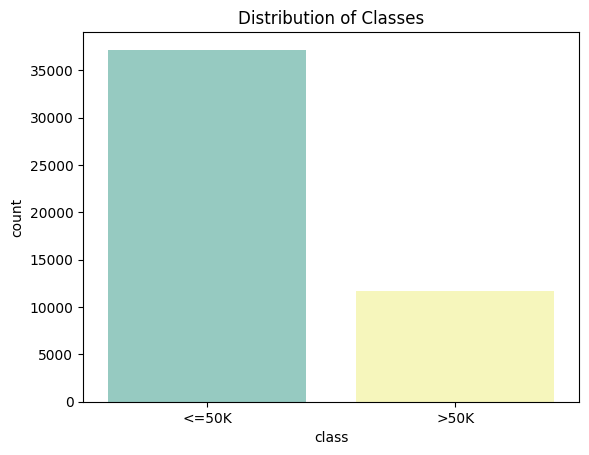

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7431
           1       0.74      0.60      0.66      2338

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769

Cross-validation scores:  [0.85515035 0.85770953 0.85361484 0.84694139 0.8510366 ]
Mean cross-validation score:  0.8528905432626546


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Adult Census Income dataset from OpenML
adult = fetch_openml(data_id=1590, as_frame=True, parser='auto')
df = adult.frame

# Rename columns to lower case and replace hyphens with underscores
df.columns = [col.lower().replace('-', '_') for col in df.columns]

# Select features and target
target = 'class'
X = df.drop(columns=[target])
y = df[target].apply(lambda x: 1 if x == '>50K' else 0)  # Convert target to binary

# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the distribution of classes
# print("Class distribution in y_train:", y_train.value_counts())
# print("Class distribution in y_test:", y_test.value_counts())

sns.countplot(x='class', data=df, hue='class', palette='Set3')
plt.title('Distribution of Classes')
plt.show()

# Identify column types
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Define preprocessing for numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the full pipeline with a classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))])

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

# Perform cross-validation to check for overfitting
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())


### Stratify in `train_test_split`

#### Description

The `stratify` parameter in `train_test_split` ensures that the train and test splits maintain the same proportion of classes as the original dataset. This is particularly useful for imbalanced datasets where some classes are underrepresented.

#### How It Works

When you set the `stratify` parameter to a target variable (usually the labels or classes), `train_test_split` will:

1. **Compute Class Proportions**: Calculate the proportion of each class in the original dataset.
2. **Maintain Proportions**: Create the train and test splits such that the class proportions are approximately the same as those in the original dataset.

#### Example Usage

In the context of binary classification with an imbalanced dataset, you can use the `stratify` parameter to ensure that both training and testing sets have a similar distribution of the classes.

### Benefits of Using Stratify

1. **Balanced Splits**: Ensures that the class distribution is the same in both training and testing sets, which is crucial for fair evaluation.
2. **Improved Model Performance**: Helps in training models that perform better on minority classes, especially in imbalanced datasets.
3. **Reliable Metrics**: Provides more reliable performance metrics by ensuring that the evaluation set has the same class distribution as the training set.

### Conclusion

Using the `stratify` parameter in `train_test_split` is a simple yet effective way to handle class imbalance during data splitting. It ensures that your training and testing sets are representative of the overall class distribution, leading to more reliable model training and evaluation.

#### Plot the distribution of classes in the training set

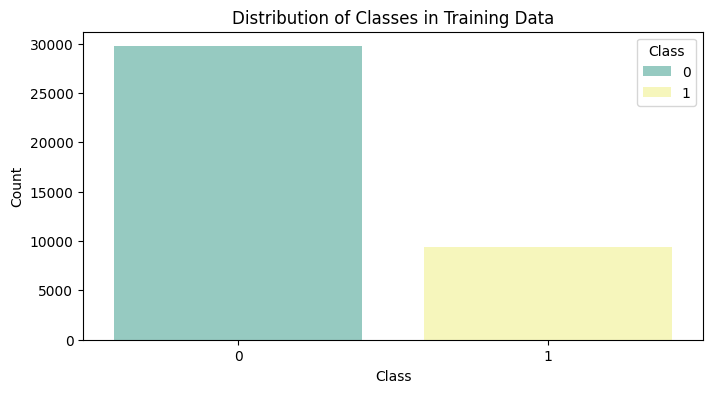

In [5]:
# Plot the distribution of classes in the training set
plt.figure(figsize=(8,4))
sns.countplot(x=y_train, hue=y_train, palette='Set3', dodge=False)
plt.title('Distribution of Classes in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

## 1. Resampling Techniques

1. **Resampling Techniques**:
   - **Oversampling**: Increase the number of instances in the minority class.
   - **Undersampling**: Decrease the number of instances in the majority class.

2. **Synthetic Data Generation**:
   - **SMOTE (Synthetic Minority Over-sampling Technique)**: Generate synthetic samples for the minority class.

3. **Class Weights**:
   - Modify the algorithm to give more weight to the minority class during training.

4. **Anomaly Detection Techniques**:
   - Treat the minority class as anomalies and use anomaly detection algorithms.



### Oversampling

Oversampling the minority class to match the majority class:


Class distribution after oversampling: class
0    29724
1    29724
Name: count, dtype: int64


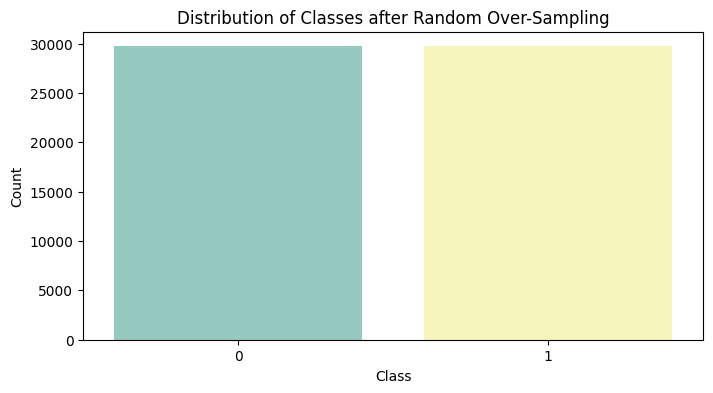

In [7]:
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Apply RandomOverSampler to balance the class distribution
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Check the distribution of classes after oversampling
print("Class distribution after oversampling:", y_resampled.value_counts())

# Plot the class distribution after Random Over-Sampling
plt.figure(figsize=(8, 4))
sns.countplot(x=y_resampled, hue=y_resampled, palette='Set3', legend=False)
plt.title('Distribution of Classes after Random Over-Sampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Undersampling

Undersampling the majority class to match the minority class:

Class distribution after undersampling: class
0    9349
1    9349
Name: count, dtype: int64


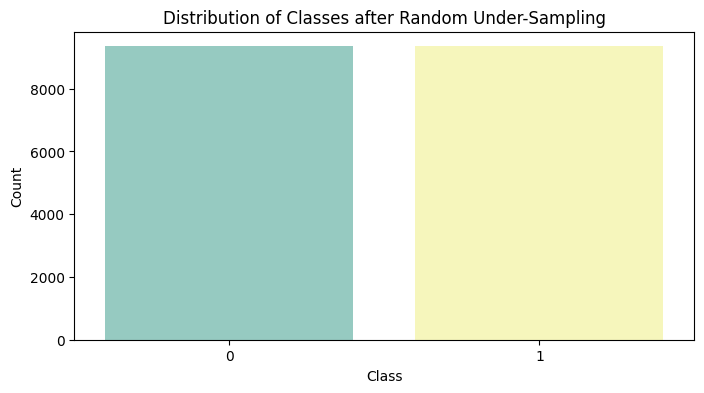

In [8]:
from imblearn.under_sampling import RandomUnderSampler

# Apply RandomUnderSampler to balance the class distribution
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Check the distribution of classes after undersampling
print("Class distribution after undersampling:", y_resampled.value_counts())

# Plot the class distribution after Random Over-Sampling
plt.figure(figsize=(8, 4))
sns.countplot(x=y_resampled, hue=y_resampled, palette='Set3', legend=False)
plt.title('Distribution of Classes after Random Under-Sampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

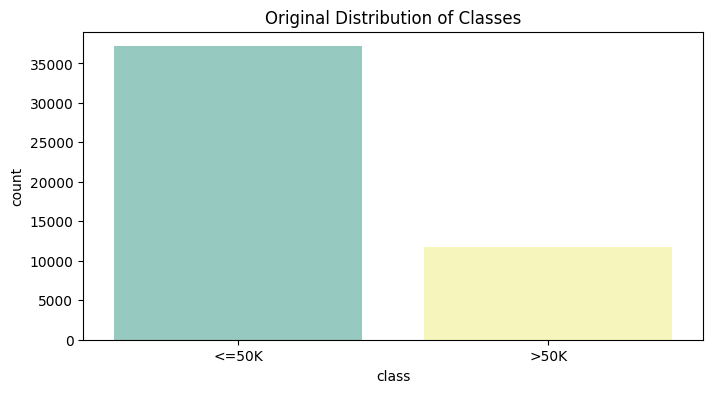

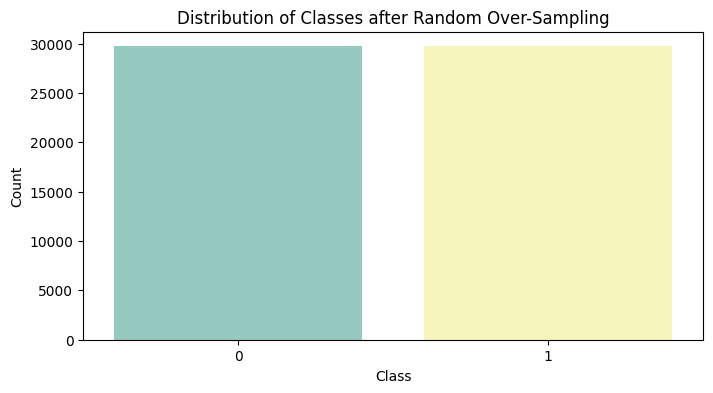

In [12]:
# Plot the original Class Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='class', data=df, hue='class', palette='Set3')
plt.title('Original Distribution of Classes')
plt.show()

# Apply RandomOverSampler to balance the class distribution
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Check the distribution of classes after oversampling
# print("Class distribution after oversampling:", y_resampled.value_counts())

# Plot the class distribution after Random Over-Sampling
plt.figure(figsize=(8, 4))
sns.countplot(x=y_resampled, hue=y_resampled, palette='Set3', legend=False)
plt.title('Distribution of Classes after Random Over-Sampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### 2. Class Weights

Modify the model to account for class imbalance by giving more weight to the minority class:

In [ ]:
# Create the pipeline with LogisticRegression with class_weight='balanced'
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86      7431
           1       0.57      0.84      0.68      2338

    accuracy                           0.81      9769
   macro avg       0.75      0.82      0.77      9769
weighted avg       0.85      0.81      0.82      9769



### 3. Synthetic Data Generation

SMOTE - Generate synthetic samples for the minority class. Does not accept missing values. NaNs and incorrect processing of the target variable caused errors that were solved in the following steps.

### Key Changes and Debugging Steps

1. **Strip Extra Whitespace**:
   - The target variable values were stripped of any extra whitespace to ensure correct comparison and conversion. This was done with `x.strip() == '>50K'`.

2. **Print Unique Values of the Target Variable**:
   - Before and after converting the target to binary, the unique values of the target variable were printed. This helped ensure that the conversion process was handled correctly and that there were indeed two distinct classes in the dataset.

3. **Class Distribution Checks**:
   - The class distribution in the entire dataset, as well as in the training and test splits, was printed. This confirmed that the dataset and splits contained both classes.

4. **Ensured No Missing Values After Preprocessing**:
   - Added a check for missing values in the preprocessed training data to ensure SMOTE received clean data.



## Under Sample Model

In [29]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold

# Create the pipeline with preprocessing, RandomUnderSampler, and LogisticRegression
undersample_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),                # Reuse the original preprocessor
    ('undersampler', RandomUnderSampler(random_state=42)),  # Apply RandomUnderSampler
    ('classifier', LogisticRegression(max_iter=1000))       # Logistic Regression
])

# Train the model using the undersampling pipeline
undersample_pipeline.fit(X_train, y_train)

# Evaluate on the test set
y_pred_undersample = undersample_pipeline.predict(X_test)
print("Undersampling Model Classification Report:")
print(classification_report(y_test, y_pred_undersample))

# Perform cross-validation with StratifiedKFold
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(undersample_pipeline, X_train, y_train, cv=cv, scoring='recall')
print("Stratified CV Recall Scores (Undersampling):", cv_scores)
print("Mean Stratified CV Recall Score (Undersampling):", cv_scores.mean())

Undersampling Model Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      7431
           1       0.57      0.84      0.68      2338

    accuracy                           0.81      9769
   macro avg       0.75      0.82      0.77      9769
weighted avg       0.85      0.81      0.82      9769

Stratified CV Recall Scores (Undersampling): [0.86096257 0.84705882 0.85187166 0.84109149 0.84919786]
Mean Stratified CV Recall Score (Undersampling): 0.8500364803735592


## Over Sample Model

In [31]:
# Create the pipeline with preprocessing, SMOTE, and LogisticRegression
final_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),                # Preprocess numeric and categorical features
    ('smote', SMOTE(random_state=42)),             # Oversample using SMOTE
    ('classifier', LogisticRegression(max_iter=1000))  # Logistic Regression
])

# Train the final model
final_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = final_pipeline.predict(X_test)
print("Oversampling Model Classification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(final_pipeline, X_train, y_train, cv=cv, scoring='recall')
print("Stratified CV Recall Scores:", cv_scores)
print("Mean Stratified CV Recall Score:", cv_scores.mean())

Oversampling Model Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.87      7431
           1       0.57      0.84      0.68      2338

    accuracy                           0.81      9769
   macro avg       0.76      0.82      0.77      9769
weighted avg       0.85      0.81      0.82      9769

Stratified CV Recall Scores: [0.85347594 0.84010695 0.84171123 0.83574104 0.84545455]
Mean Stratified CV Recall Score: 0.8432979402179667


## Original Model

In [30]:
# Create the full pipeline with a classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))])

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
print("Original Model Classification Report:")
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

# Cross-validation
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='recall')
print("Stratified CV F1-scores:", cv_scores)
print("Mean Stratified CV F1-score:", cv_scores.mean())

Original Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7431
           1       0.74      0.60      0.66      2338

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769

Stratified CV F1-scores: [0.60588235 0.6144385  0.59572193 0.60727662 0.58930481]
Mean Stratified CV F1-score: 0.6025248424190923




### **Comparison Summary**

| **Model**         | **Precision (Class 1)** | **Recall (Class 1)** | **F1-Score (Class 1)** | **Accuracy** | **Mean CV Recall (Class 1)** |
|--------------------|-------------------------|-----------------------|-------------------------|--------------|-----------------------------|
| **Original**       | 0.74                   | 0.60                 | 0.66                   | 0.85         | 0.60                        |
| **Undersampling**  | 0.57                   | 0.84                 | 0.68                   | 0.81         | 0.85                        |
| **Oversampling**   | 0.57                   | 0.84                 | 0.68                   | 0.81         | 0.84                        |

---

### **Observations**
1. **Original Model:**
   - **Strengths:** High precision for class 1 (0.74) and the highest overall accuracy (0.85).
   - **Weaknesses:** Recall for class 1 (0.60) is the lowest among the three models, meaning it misses a significant number of loan defaults.
   - **Suitability:** Not ideal for scenarios prioritizing recall for class 1, as it sacrifices recall to achieve higher precision and accuracy.

2. **Undersampling Model:**
   - **Strengths:** Achieves the highest recall for class 1 (0.84), indicating it correctly identifies most loan defaults. Mean CV recall (0.85) confirms consistency across folds.
   - **Weaknesses:** Precision for class 1 (0.57) is reduced compared to the original model, suggesting more false positives. Accuracy (0.81) is slightly lower.
   - **Suitability:** Excellent choice when recall for class 1 is critical, but trade-offs in precision and accuracy must be considered.

3. **Oversampling Model:**
   - **Strengths:** Matches the undersampling model in recall for class 1 (0.84) and overall F1-score (0.68). Mean CV recall (0.84) demonstrates stability.
   - **Weaknesses:** Like undersampling, it sacrifices precision for class 1 (0.57) and overall accuracy (0.81).
   - **Suitability:** Comparable to undersampling, but avoids the drawback of losing majority-class data.

---

### **Recommendation**
For predicting loan defaults where **recall for class 1** is the priority:
- Both **undersampling** and **oversampling** perform significantly better than the original model in terms of recall (0.84 vs. 0.60).
- **Undersampling** provides slightly better mean recall (0.85) but comes at the cost of discarding majority-class data, which might lead to issues if your dataset is small or majority-class patterns are essential.
- **Oversampling** achieves nearly identical performance without discarding data, making it a more robust and generalizable choice.

